In [1]:
import numpy as np
from NetBuilder import *
from Graph import *

In [2]:
#create 2 input layers and 1 output placeholder for trainning purpose
x1=NNetLayers("Inputs",net_specification={"dtype":tf.float32, "shape":[None, 64]},name="x1")
x2=NNetLayers("Inputs",net_specification={"dtype":tf.float32, "shape":[None, 64]},name="x2")
y_l7=NNetLayers("Inputs",net_specification={"dtype":tf.float32, "shape":[None, 42]},name="y_l7")

#Create many layers
l1=NNetLayers("dense",net_specification={"units":64},name="l1")
l2x=NNetLayers("+",name="l2x")
l2=NNetLayers("dense",net_specification=[64],name="l2")
l3x=NNetLayers("+",name="l3x")
l3=NNetLayers("dense",net_specification=[8],name="l3")
l4=NNetLayers("dense",net_specification=[250],name="l4")
l5=NNetLayers("dense",net_specification=[42],name="l5")
l6=NNetLayers("dense",net_specification=[42],name="l6")
l6_d=NNetLayers("dropout",net_specification={"rate":0.5},name="l6_d")

#Create final output layer
l7=NNetLayers("+",name="l7")

#define loss to be mean-square error
loss=NNetLayers("MSE",name="MSE_loss")

#build the graph of our netword
Net=Graph([x1,x2,y_l7,l1,l2,l2x,l3,l3x,l4,l5,l6,l6_d,l7,loss],[(x1,l1),(l2,l2x),(x1,l2x),(x2,l2),(l1,l3x),(l2x,l3x),(l3x,l3),(l2,l4),
                                                     (l4,l5),(l3,l6),(l6,l6_d),(l6_d,l7),(l5,l7),(l7,loss),(y_l7,loss)])
#create the actual net
neural_net=NNet({"x1":x1,"x2":x2,"y_l7":y_l7},[l7],Net)
#create our optin
neural_net.create_optimizer("loss_optimizer","AdamOptimizer","MSE_loss",args={"learning_rate":0.01})


In [3]:
neural_net.build_net("tf")

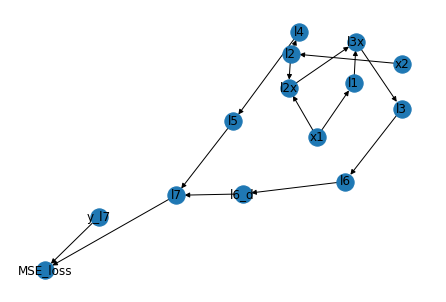

In [4]:
neural_net.display()

In [5]:
val_x1=np.random.rand(64,64)
val_x2=np.random.rand(64,64)
val_y=np.random.rand(64,42)

out=neural_net.run_net({"x1":val_x1,"x2":val_x2})

In [6]:
out=neural_net.train_net({"x1":val_x1,"x2":val_x2,"y_l7":val_y},"loss_optimizer",epochs=83)

In [7]:
out=neural_net.run_net({"x1":val_x1,"x2":val_x2})

In [8]:
out

[array([[-0.4264219 ,  0.9725154 , -0.22450614, ...,  1.0685112 ,
          0.38900566,  0.80049545],
        [ 0.32024056,  0.06250014, -0.0019564 , ...,  0.78466046,
          0.70294863, -0.38277408],
        [-0.32991853,  0.6136511 ,  0.07536878, ...,  0.8157946 ,
          0.28271994,  0.35646915],
        ...,
        [ 0.9097606 ,  0.4502106 ,  0.6647498 , ...,  0.33236495,
         -0.01773675,  0.4839452 ],
        [ 0.65643835,  0.8379276 , -0.00327955, ...,  0.103792  ,
          0.00793306,  1.0551674 ],
        [ 0.09112385,  1.2868438 ,  0.7605781 , ...,  1.2160509 ,
         -0.0775583 ,  0.30288047]], dtype=float32)]